In [1]:
from tensorflow.keras.models import load_model

In [23]:
facetracker = load_model('facetracker.h5')

In [24]:
import cv2
import tensorflow as tf

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('Facetrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 138ms/step


In [3]:
# Import opencv for computer vision stuff
import cv2
# Import matplotlib so we can visualize an image
from matplotlib import pyplot as plt

In [5]:
# Connect to capture device
cap = cv2.VideoCapture(0)

In [10]:
# Get a frame from the capture device
ret, frame = cap.read()

In [11]:
print(ret)

True


In [12]:
print(frame)

[[[239 233 225]
  [238 232 224]
  [238 232 224]
  ...
  [188 200 188]
  [189 200 187]
  [189 200 187]]

 [[239 235 225]
  [240 236 226]
  [241 237 228]
  ...
  [191 203 190]
  [193 204 190]
  [188 199 186]]

 [[237 237 222]
  [238 238 224]
  [239 239 226]
  ...
  [194 205 192]
  [195 206 193]
  [189 200 187]]

 ...

 [[138 152 199]
  [145 155 214]
  [139 145 215]
  ...
  [ 68  87 128]
  [ 72  92 131]
  [ 94 114 153]]

 [[158 176 219]
  [153 172 224]
  [156 174 236]
  ...
  [ 69  84 136]
  [ 76  91 138]
  [ 80  95 141]]

 [[153 175 215]
  [145 168 217]
  [135 159 218]
  ...
  [ 65  79 135]
  [ 78  90 140]
  [ 85  97 147]]]


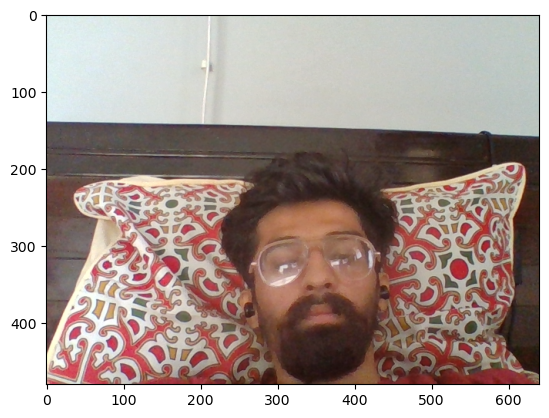

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# Releases capture back into the wild 
cap.release()

In [20]:
def take_photo(): 
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('webcamphoto.jpg', frame)
    cap.release()

In [21]:
take_photo()

In [22]:
# Connect to webcam
cap = cv2.VideoCapture(0)
# Loop through every frame until we close our webcam
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Show image 
    cv2.imshow('Webcam', frame)
    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

# Releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()